In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt
import pandas as pd
import requests
import re

In [3]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/filings/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

ipo_dfs

[      Filing Date Symbol                           Company Name  \
 0     May 3, 2024    TBN         Tamboran Resources Corporation   
 1    Apr 29, 2024   HWEC                   HW Electro Co., Ltd.   
 2    Apr 29, 2024   DTSQ  DT Cloud Star Acquisition Corporation   
 3    Apr 26, 2024   EURK                Eureka Acquisition Corp   
 4    Apr 26, 2024    HDL    Super Hi International Holding Ltd.   
 ..            ...    ...                                    ...   
 319  Jan 21, 2020   GOXS                            Goxus, Inc.   
 320  Jan 21, 2020   UTXO                 UTXO Acquisition, Inc.   
 321   Dec 9, 2019   LOHA                           Loha Co. Ltd   
 322   Oct 4, 2019   ZGHB  China Eco-Materials Group Co. Limited   
 323  Dec 27, 2018   FBOX              Fit Boxx Holdings Limited   
 
         Price Range Shares Offered  
 0                 -              -  
 1             $3.00        3750000  
 2            $10.00        6000000  
 3            $10.00        50

In [4]:
ipos = ipo_dfs[0]
pd.to_datetime(ipos['Filing Date'],format='mixed')

0     2024-05-03
1     2024-04-29
2     2024-04-29
3     2024-04-26
4     2024-04-26
         ...    
319   2020-01-21
320   2020-01-21
321   2019-12-09
322   2019-10-04
323   2018-12-27
Name: Filing Date, Length: 324, dtype: datetime64[ns]

In [5]:
ipos = ipo_dfs[0]
ipos['Filing Date'] = pd.to_datetime(ipos['Filing Date'],format='mixed')
ipos.loc[ipos['Shares Offered'].astype(str).str.find('-') >= 0,'Shares Offered'] = np.nan
ipos['Shares Offered'] = pd.to_numeric(ipos['Shares Offered'])
ipos.head()

,Filing Date,Symbol,Company Name,Price Range,Shares Offered
0,2024-05-03,TBN,Tamboran Resources Corporation,-,NaN
1,2024-04-29,HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0
2,2024-04-29,DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0
3,2024-04-26,EURK,Eureka Acquisition Corp,$10.00,5000000.0
4,2024-04-26,HDL,Super Hi International Holding Ltd.,-,NaN


In [6]:
ipos['Price Range'] = ipos['Price Range'].astype(str).apply(lambda x: np.array(re.findall("\d+\.*\d+", x)))
ipos['Price Range'] = ipos['Price Range'].apply(lambda x: x.astype(np.float64))
ipos['Price Range']

0               []
1            [3.0]
2           [10.0]
3           [10.0]
4               []
          ...     
319    [8.0, 10.0]
320         [10.0]
321    [8.0, 10.0]
322          [4.0]
323     [5.0, 6.5]
Name: Price Range, Length: 324, dtype: object

In [7]:
ipos['Avg_Price'] = ipos['Price Range']
ipos['Avg_Price'] = ipos['Avg_Price'].apply(lambda x: np.mean(x))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [8]:
ipos['Avg_Price']

0        NaN
1       3.00
2      10.00
3      10.00
4        NaN
       ...  
319     9.00
320    10.00
321     9.00
322     4.00
323     5.75
Name: Avg_Price, Length: 324, dtype: float64

In [9]:
ipos['Shares_offered_value'] = ipos['Avg_Price']*ipos['Shares Offered']
ipos['Shares_offered_value']


0             NaN
1      11250000.0
2      60000000.0
3      50000000.0
4             NaN
          ...    
319    13500000.0
320    50000000.0
321    22500000.0
322    17200000.0
323    11500000.0
Name: Shares_offered_value, Length: 324, dtype: float64

In [10]:
sum_df = ipos.loc[ipos['Filing Date'].dt.day_name() == 'Friday']
sum_df

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Avg_Price,Shares_offered_value
0,2024-05-03,TBN,Tamboran Resources Corporation,[],NaN,NaN,NaN
3,2024-04-26,EURK,Eureka Acquisition Corp,[10.0],5000000.0,10.00,5.000000e+07
4,2024-04-26,HDL,Super Hi International Holding Ltd.,[],NaN,NaN,NaN
8,2024-04-12,BOW,Bowhead Specialty Holdings Inc.,[],NaN,NaN,NaN
9,2024-04-05,SPHL,Springview Holdings Ltd,"[4.0, 5.0]",2000000.0,4.50,9.000000e+06
...,...,...,...,...,...,...,...
297,2021-03-05,HRDG,Huarui International New Material Limited,"[4.0, 6.0]",2400000.0,5.00,1.200000e+07
309,2021-02-19,EOCO,Elliott Opportunity I Corp.,[10.0],100000000.0,10.00,1.000000e+09
312,2021-01-22,TONY,"Tony Fun, Inc.","[7.0, 7.5]",4177500.0,7.25,3.028688e+07
316,2020-09-04,SCIT,Sancai Holding Group Ltd.,[],NaN,NaN,NaN


In [11]:
sum_df = sum_df.loc[ipos['Filing Date']>'2022-12-31']

In [12]:
sum_df = sum_df.loc[ipos['Filing Date']<'2024-01-01']

In [13]:
len(sum_df)

32

In [14]:
sum_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 49 to 164
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Filing Date           32 non-null     datetime64[ns]
 1   Symbol                32 non-null     object        
 2   Company Name          32 non-null     object        
 3   Price Range           32 non-null     object        
 4   Shares Offered        25 non-null     float64       
 5   Avg_Price             25 non-null     float64       
 6   Shares_offered_value  25 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.0+ KB


In [15]:
sum_df['Shares_offered_value'].sum()

285700000.0

Question 2

In [16]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/2023/"
response = requests.get(url, headers=headers)

ipo_2023 = pd.read_html(response.text)

url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)
ipo_2024 = pd.read_html(response.text)

In [17]:
ipo_2023 = ipo_2023[0]
ipo_2023

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"Dec 27, 2023",IROH,Iron Horse Acquisitions Corp.,$10.00,$10.05,0.50%
1,"Dec 19, 2023",LGCB,Linkage Global Inc,$4.00,$2.99,-27.25%
2,"Dec 15, 2023",ZKH,ZKH Group Limited,$15.50,$12.64,-18.65%
3,"Dec 15, 2023",BAYA,Bayview Acquisition Corp,$10.00,$10.18,1.80%
4,"Dec 14, 2023",INHD,Inno Holdings Inc.,$4.00,$0.64,-84.05%
...,...,...,...,...,...,...
149,"Jan 25, 2023",QSG,QuantaSing Group Ltd,$12.50,$3.31,-74.80%
150,"Jan 20, 2023",CVKD,"Cadrenal Therapeutics, Inc.",$5.00,$0.49,-90.40%
151,"Jan 13, 2023",SKWD,"Skyward Specialty Insurance Group, Inc.",$15.00,$37.01,146.03%
152,"Jan 13, 2023",ISRL,Israel Acquisitions Corp,$10.00,$10.93,9.30%


In [18]:
ipo_2024 = ipo_2024[0]
ipo_2024


,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"May 9, 2024",SVCO,"Silvaco Group, Inc.",$19.00,$19.48,7.68%
1,"May 9, 2024",PAL,"Proficient Auto Logistics, Inc.",$15.00,$14.78,-0.90%
2,"May 8, 2024",NNE,Nano Nuclear Energy Inc.,$4.00,$4.76,34.75%
3,"May 1, 2024",VIK,Viking Holdings Ltd.,$24.00,$28.59,19.54%
4,"Apr 26, 2024",ZONE,"CleanCore Solutions, Inc.",$4.00,$3.17,-20.75%
...,...,...,...,...,...,...
62,"Jan 18, 2024",PSBD,Palmer Square Capital BDC Inc.,$16.45,$16.76,1.22%
63,"Jan 18, 2024",CCTG,CCSC Technology International Holdings Limited,$6.00,$2.79,-54.17%
64,"Jan 12, 2024",SYNX,Silynxcom Ltd.,$4.00,$2.58,-35.50%
65,"Jan 11, 2024",SDHC,Smith Douglas Homes Corp.,$21.00,$29.13,38.83%


In [19]:
comb_df = pd.concat([ipo_2023[::-1],ipo_2024[::-1]])

comb_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
153,"Jan 13, 2023",MGOL,MGO Global Inc.,$5.00,$0.22,-95.60%
152,"Jan 13, 2023",ISRL,Israel Acquisitions Corp,$10.00,$10.93,9.30%
151,"Jan 13, 2023",SKWD,"Skyward Specialty Insurance Group, Inc.",$15.00,$37.01,146.03%
150,"Jan 20, 2023",CVKD,"Cadrenal Therapeutics, Inc.",$5.00,$0.49,-90.40%
149,"Jan 25, 2023",QSG,QuantaSing Group Ltd,$12.50,$3.31,-74.80%
...,...,...,...,...,...,...
4,"Apr 26, 2024",ZONE,"CleanCore Solutions, Inc.",$4.00,$3.17,-20.75%
3,"May 1, 2024",VIK,Viking Holdings Ltd.,$24.00,$28.59,19.54%
2,"May 8, 2024",NNE,Nano Nuclear Energy Inc.,$4.00,$4.76,34.75%
1,"May 9, 2024",PAL,"Proficient Auto Logistics, Inc.",$15.00,$14.78,-0.90%


In [20]:
comb_df['IPO Date'] = pd.to_datetime(comb_df['IPO Date'])
comb_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
153,2023-01-13,MGOL,MGO Global Inc.,$5.00,$0.22,-95.60%
152,2023-01-13,ISRL,Israel Acquisitions Corp,$10.00,$10.93,9.30%
151,2023-01-13,SKWD,"Skyward Specialty Insurance Group, Inc.",$15.00,$37.01,146.03%
150,2023-01-20,CVKD,"Cadrenal Therapeutics, Inc.",$5.00,$0.49,-90.40%
149,2023-01-25,QSG,QuantaSing Group Ltd,$12.50,$3.31,-74.80%
...,...,...,...,...,...,...
4,2024-04-26,ZONE,"CleanCore Solutions, Inc.",$4.00,$3.17,-20.75%
3,2024-05-01,VIK,Viking Holdings Ltd.,$24.00,$28.59,19.54%
2,2024-05-08,NNE,Nano Nuclear Energy Inc.,$4.00,$4.76,34.75%
1,2024-05-09,PAL,"Proficient Auto Logistics, Inc.",$15.00,$14.78,-0.90%


In [21]:
comb_df = comb_df.loc[comb_df['IPO Date'] < '2024-03-01']
comb_df = comb_df.drop(comb_df[comb_df['Symbol']=='RYZB'].index)
comb_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
153,2023-01-13,MGOL,MGO Global Inc.,$5.00,$0.22,-95.60%
152,2023-01-13,ISRL,Israel Acquisitions Corp,$10.00,$10.93,9.30%
151,2023-01-13,SKWD,"Skyward Specialty Insurance Group, Inc.",$15.00,$37.01,146.03%
150,2023-01-20,CVKD,"Cadrenal Therapeutics, Inc.",$5.00,$0.49,-90.40%
149,2023-01-25,QSG,QuantaSing Group Ltd,$12.50,$3.31,-74.80%
...,...,...,...,...,...,...
40,2024-02-14,UMAC,"Unusual Machines, Inc.",$4.00,$1.10,-73.75%
39,2024-02-16,CHRO,Chromocell Therapeutics Corp,$6.00,$1.77,-70.83%
38,2024-02-21,DYCQ,DT Cloud Acquisition Corporation,$10.00,$10.16,1.60%
37,2024-02-22,VHAI,Vocodia Holdings Corp,$4.25,$0.14,-96.73%


In [22]:
comb_df['start_date'] = comb_df['IPO Date'].astype('str')


In [23]:
def get_growth(ticker,days):
  try:
    multi_data = yf.download(ticker, start = comb_df['start_date'].loc[comb_df['Symbol']==ticker].iloc[0],interval = "1d")
    multi_data['growth_30d'] = multi_data['Adj Close'] / multi_data['Adj Close'].shift(days)
    return multi_data['growth_30d'].iloc[days]
  except:
    return np.nan

In [ ]:
ticker_list = comb_df['Symbol'].to_list()
growth = {}

for i in range(1,31):
  print(i)
  growth = []
  for ticker in ticker_list:
      growth.append(get_growth(ticker,i))
      col = 'growth'+str(i)+'d'
  comb_df[col] = growth



In [29]:
a = comb_df.describe()

In [30]:
a

,IPO Date,growth1d,growth2d,growth3d,growth4d,growth5d,growth6d,growth7d,growth8d,growth9d,...,growth22d,growth23d,growth24d,growth25d,growth26d,growth27d,growth28d,growth29d,growth30d,growth_30d
count,183,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,180.000000,180.000000
mean,2023-07-31 00:47:12.786885120,0.952112,0.941829,0.935849,0.927208,0.913851,0.910443,0.899261,0.897610,0.901882,...,0.916843,0.916746,0.911656,0.906156,0.905626,0.891725,0.897724,0.894697,0.888248,0.888248
min,2023-01-13 00:00:00,0.153569,0.108733,0.086641,0.094257,0.081118,0.087677,0.085261,0.090123,0.095616,...,0.048326,0.049361,0.048326,0.048326,0.045219,0.044529,0.046945,0.042803,0.040387,0.040387
25%,2023-04-04 00:00:00,0.930590,0.906105,0.869074,0.859097,0.792430,0.784618,0.792265,0.758096,0.745804,...,0.613538,0.619355,0.634361,0.630297,0.600000,0.609026,0.645598,0.628235,0.623361,0.623361
50%,2023-07-26 00:00:00,1.000000,1.000000,0.998321,0.995105,0.991773,0.968981,0.972382,0.979680,0.982526,...,0.992500,0.984509,0.983511,0.966194,0.975000,0.974138,0.974441,0.969529,0.971168,0.971168
75%,2023-11-10 00:00:00,1.015726,1.020828,1.011465,1.011958,1.007746,1.006907,1.006829,1.006465,1.011042,...,1.038710,1.029362,1.040847,1.028571,1.028524,1.038591,1.040796,1.026364,1.024513,1.024513
max,2024-02-27 00:00:00,1.362069,1.464015,2.380000,2.083710,2.262443,2.529870,2.173913,2.359740,2.751948,...,3.871041,3.846154,3.803394,3.427273,4.817886,4.434146,4.570732,4.247155,3.629268,3.629268
std,NaN,0.164036,0.198207,0.240716,0.256779,0.289056,0.302774,0.293823,0.316345,0.348458,...,0.483289,0.496624,0.491739,0.495256,0.538939,0.503858,0.502877,0.481762,0.454897,0.454897


In [41]:
a.iloc[5,1:]

growth1d      1.015726
growth2d      1.020828
growth3d      1.011465
growth4d      1.011958
growth5d      1.007746
growth6d      1.006907
growth7d      1.006829
growth8d      1.006465
growth9d      1.011042
growth10d     1.007121
growth11d     1.010549
growth12d     1.014287
growth13d     1.019114
growth14d      1.01777
growth15d      1.01481
growth16d     1.015147
growth17d     1.010853
growth18d     1.015375
growth19d     1.021154
growth20d     1.015584
growth21d     1.014706
growth22d      1.03871
growth23d     1.029362
growth24d     1.040847
growth25d     1.028571
growth26d     1.028524
growth27d     1.038591
growth28d     1.040796
growth29d     1.026364
growth30d     1.024513
growth_30d    1.024513
Name: 75%, dtype: object

Question 3

In [42]:
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

LARGEST_STOCKS = US_STOCKS + EU_STOCKS + INDIA_STOCKS

NEW_US = ['TSLA','WMT','XOM','UNH','MA','PG','JNJ','MRK','HD','COST','ORCL']

NEW_EU = ['PRX.AS','CDI.PA','AIR.PA','SU.PA','ETN','SNY','BUD','DTE.DE','ALV.DE','MDT','AI.PA','EL.PA']

NEW_INDIA = ['BAJFINANCE.NS','MARUTI.NS','HCLTECH.NS','TATAMOTORS.NS','SUNPHARMA.NS','ONGC.NS','ADANIENT.NS','ADANIENT.NS','NTPC.NS','KOTAKBANK.NS','TITAN.NS']

LARGE_STOCKS = NEW_EU + NEW_US + NEW_INDIA

In [124]:
multi_data = yf.download(LARGEST_STOCKS, start = '2013-12-01',interval = "1d")
multi_data[[("growth_7d", col) for col in LARGEST_STOCKS]] = np.nan
for i in LARGEST_STOCKS:
  multi_data['growth_7d',i] = multi_data['Adj Close',i] / multi_data['Adj Close',i].shift(7)
multi_data = multi_data.loc[multi_data.index>='2014-01-01']
largest_stocks_growth = multi_data['growth_7d'].mean(axis=1).values

[*********************100%%**********************]  33 of 33 completed


In [125]:
multi_data = yf.download(LARGE_STOCKS, start = '2013-12-01',interval = "1d")
multi_data[[("growth_7d", col) for col in LARGE_STOCKS]] = np.nan
for i in LARGE_STOCKS:
  multi_data['growth_7d',i] = multi_data['Adj Close',i] / multi_data['Adj Close',i].shift(7)
multi_data = multi_data.loc[multi_data.index>='2014-01-01']
large_stocks_growth = multi_data['growth_7d'].mean(axis=1).values

[*********************100%%**********************]  33 of 33 completed


In [128]:
largest_stocks_growth.shape

(2688,)

In [129]:
large_stocks_growth.shape

(2688,)

In [131]:
np.sum(large_stocks_growth>largest_stocks_growth)

1246

In [133]:
int(100*(1246/2595))

48

Question 4

In [140]:
# https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab
# Update (apr 2023): Colab is now Python 3.10
# there are some other (older) ways to install talib

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib as ta


# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

# You're required to add EU_STOCKS and INDIA_STOCS
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']


ALL_TICKERS = US_STOCKS  + EU_STOCKS + INDIA_STOCKS
ALL_TICKERS


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4143    0  4143    0     0  16669      0 --:--:-- --:--:-- --:--:-- 16705
100  517k  100  517k    0     0   869k      0 --:--:-- --:--:-- --:--:-- 4700k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4131    0  4131    0     0  17553      0 --:--:-- --:--:-- --:--:-- 17578
100  392k  100  392k    0     0   795k      0 --:--:-- --:--:-- --:--:--  795k


['MSFT',
 'AAPL',
 'GOOG',
 'NVDA',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'V',
 'JPM',
 'NVO',
 'MC.PA',
 'ASML',
 'RMS.PA',
 'OR.PA',
 'SAP',
 'ACN',
 'TTE',
 'SIE.DE',
 'IDEXY',
 'CDI.PA',
 'RELIANCE.NS',
 'TCS.NS',
 'HDB',
 'BHARTIARTL.NS',
 'IBN',
 'SBIN.NS',
 'LICI.NS',
 'INFY',
 'ITC.NS',
 'HINDUNILVR.NS',
 'LT.NS']

In [168]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                     period = "max",
                     interval = "1d")

  historyPrices['cci'] = ta.CCI(np.asarray(historyPrices['High']), np.asarray(historyPrices['Low']),
                    np.asarray(historyPrices['Close']), timeperiod=20)

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_5d_future'] = np.where(historyPrices['growth_future_5d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

0 MSFT


[*********************100%%**********************]  1 of 1 completed


1 AAPL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

2 GOOG


3 NVDA


[*********************100%%**********************]  1 of 1 completed


4 AMZN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

5 META


6 BRK-B


[*********************100%%**********************]  1 of 1 completed


7 LLY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

8 AVGO


9 V


[*********************100%%**********************]  1 of 1 completed


10 JPM


[*********************100%%**********************]  1 of 1 completed


11 NVO


[*********************100%%**********************]  1 of 1 completed


12 MC.PA


[*********************100%%**********************]  1 of 1 completed


13 ASML


[*********************100%%**********************]  1 of 1 completed


14 RMS.PA


[*********************100%%**********************]  1 of 1 completed


15 OR.PA


[*********************100%%**********************]  1 of 1 completed


16 SAP


[*********************100%%**********************]  1 of 1 completed


17 ACN


[*********************100%%**********************]  1 of 1 completed


18 TTE


[*********************100%%**********************]  1 of 1 completed


19 SIE.DE


[*********************100%%**********************]  1 of 1 completed


20 IDEXY


[*********************100%%**********************]  1 of 1 completed


21 CDI.PA


[*********************100%%**********************]  1 of 1 completed


22 RELIANCE.NS


[*********************100%%**********************]  1 of 1 completed


23 TCS.NS


[*********************100%%**********************]  1 of 1 completed


24 HDB


[*********************100%%**********************]  1 of 1 completed


25 BHARTIARTL.NS


[*********************100%%**********************]  1 of 1 completed


26 IBN


[*********************100%%**********************]  1 of 1 completed


27 SBIN.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

28 LICI.NS


29 INFY


[*********************100%%**********************]  1 of 1 completed


30 ITC.NS


[*********************100%%**********************]  1 of 1 completed


31 HINDUNILVR.NS


[*********************100%%**********************]  1 of 1 completed


32 LT.NS


[*********************100%%**********************]  1 of 1 completed


In [178]:

def get_ticker_type(ticker:str, us_stocks_list, eu_stocks_list, india_stocks_list):
  if ticker in us_stocks_list:
    return 'US'
  elif ticker in eu_stocks_list:
    return 'EU'
  elif ticker in india_stocks_list:
    return 'INDIA'
  else:
    return 'ERROR'

stocks_df['ticker_type'] = stocks_df.Ticker.apply(lambda x:get_ticker_type(x, US_STOCKS, EU_STOCKS, INDIA_STOCKS))
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

stocks_df = stocks_df[stocks_df.Date>='2013-01-01']
stocks_df = stocks_df[stocks_df.Date<='2023-12-31']
stocks_df = stocks_df.set_index('Date',drop=True)
stocks_df = stocks_df[stocks_df.index.day_name() == 'Friday']

In [179]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17692 entries, 2013-01-04 to 2023-12-29
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open                          17692 non-null  float64
 1   High                          17692 non-null  float64
 2   Low                           17692 non-null  float64
 3   Close                         17692 non-null  float64
 4   Adj Close                     17692 non-null  float64
 5   Volume                        17692 non-null  int64  
 6   cci                           17688 non-null  float64
 7   Ticker                        17692 non-null  object 
 8   Year                          17692 non-null  int32  
 9   Month                         17692 non-null  int32  
 10  Weekday                       17692 non-null  int32  
 11  growth_1d                     17692 non-null  float64
 12  growth_3d                     17692 non-nul

In [180]:
stocks_df

,Open,High,Low,Close,Adj Close,Volume,cci,Ticker,Year,Month,...,growth_90d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future,ticker_type
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.814932,52521100,-33.661768,MSFT,2013,1,...,0.890936,1.012646,1.003365,27.088000,27.073000,1,0.027963,4.936143,1,US
2013-01-11,26.490000,26.930000,26.280001,26.830000,21.888350,55512100,-75.038524,MSFT,2013,1,...,0.892166,1.020874,1.015654,26.810000,27.000000,0,0.029696,4.810801,1,US
2013-01-18,27.100000,27.290001,27.040001,27.250000,22.230997,52167700,54.434990,MSFT,2013,1,...,0.887687,1.106302,1.024220,26.887000,26.987500,0,0.011246,4.418102,1,US
2013-01-25,27.580000,28.230000,27.389999,27.879999,22.744965,81847700,160.925319,MSFT,2013,1,...,0.908504,1.153897,1.001793,27.274000,27.048500,1,0.036931,4.895197,1,US
2013-02-01,27.670000,28.049999,27.549999,27.930000,22.785751,55565900,92.139377,MSFT,2013,2,...,0.895374,1.172929,0.986395,27.667000,27.251500,1,0.021944,6.028117,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,3129.949951,3197.949951,3121.050049,3190.649902,3190.649902,2112908,179.390956,LT.NS,2023,12,...,1.284430,2.043276,1.058859,3088.844995,3043.684998,1,0.024102,1254.661141,1,INDIA
2023-12-08,3377.000000,3430.000000,3366.000000,3378.449951,3378.449951,2428891,156.482320,LT.NS,2023,12,...,1.272863,2.301709,1.032426,3224.319995,3143.325000,1,0.018944,2357.872177,1,INDIA
2023-12-15,3435.149902,3498.899902,3432.850098,3488.000000,3488.000000,2632935,111.207751,LT.NS,2023,12,...,1.342519,2.368554,0.997119,3380.445020,3234.645007,1,0.018936,2743.369780,0,INDIA


<Axes: xlabel='Date'>

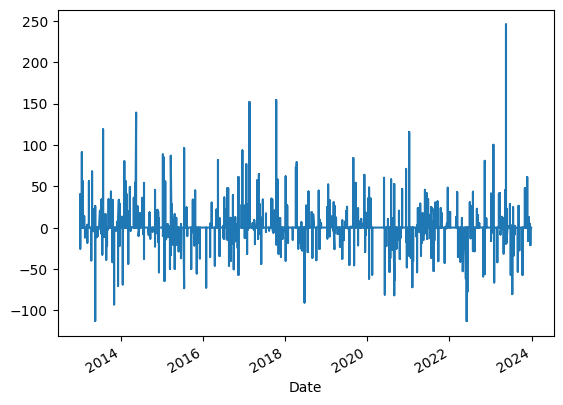

In [184]:
stocks_df['profit'] = 1000*stocks_df['growth_future_5d'] - 1000
stocks_df.loc[stocks_df['cci'] < 200,'profit'] = 0
stocks_df['profit'].plot()

In [186]:
stocks_df['profit'].sum()

1885.4347288128124